In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

Ouvrir la base de données

In [31]:
import pandas as pd
df_credit=pd.read_csv(r'C:\Users\HP\Documents\GitHub\data_project\data\train.csv')

print(df_credit.head())    

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [32]:
df = df_credit.copy()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.shape

(614, 13)

In [35]:
#verifier si on a des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes:
-Pour les variables catégoriques: on les remplace par le mode.
-Pour les variables numériques: on les remplace par la médiane

In [36]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Séparation des variables

In [37]:
var_cat=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('les variables categorielles sont:',var_cat)
print('les variables numeriques sont:',var_num)

les variables categorielles sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numeriques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [38]:
#supprimer les valeurs manquantes concernant les variables categorielles
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_2360\1523832820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2360\1523832820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [39]:
#supprimer les valeurs manquantes concernant les variables numeriques
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2360\1348401011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2360\1348401011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Analyse univariée

In [41]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [42]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

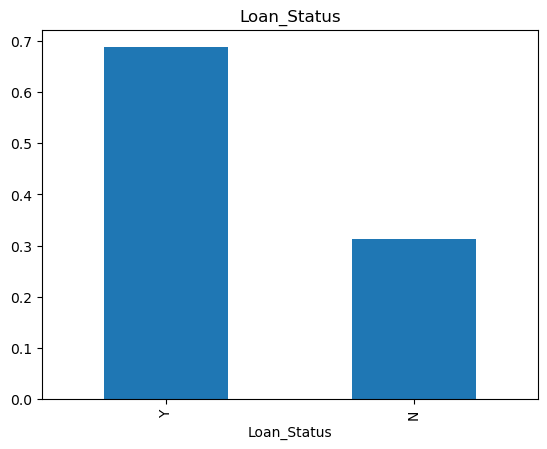

In [43]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')

Les variables catégoriques

In [44]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [45]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

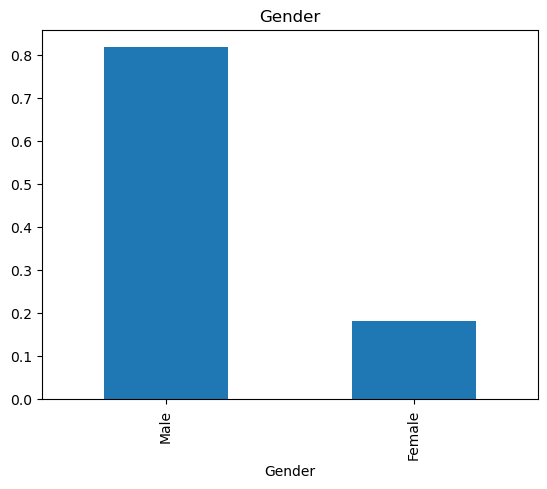

In [46]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

In [47]:
df['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

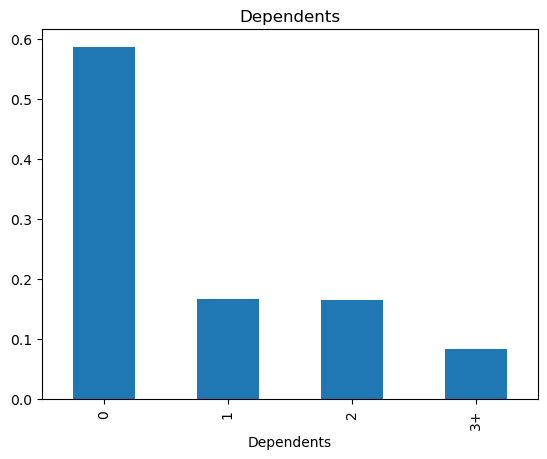

In [48]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

In [49]:
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_2360\2257780309.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome']);


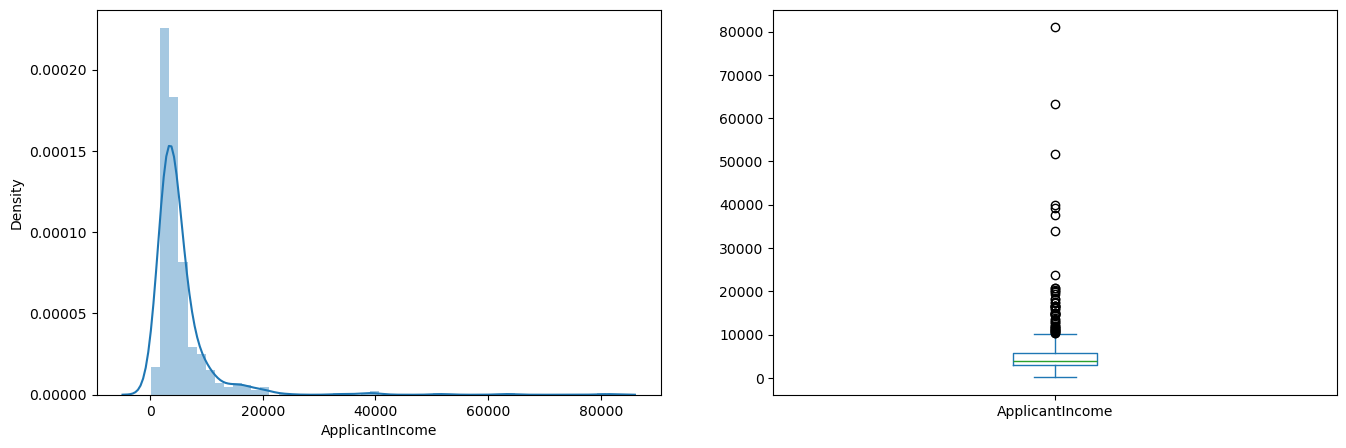

In [52]:
#applicanr income
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

Analyse bivariée

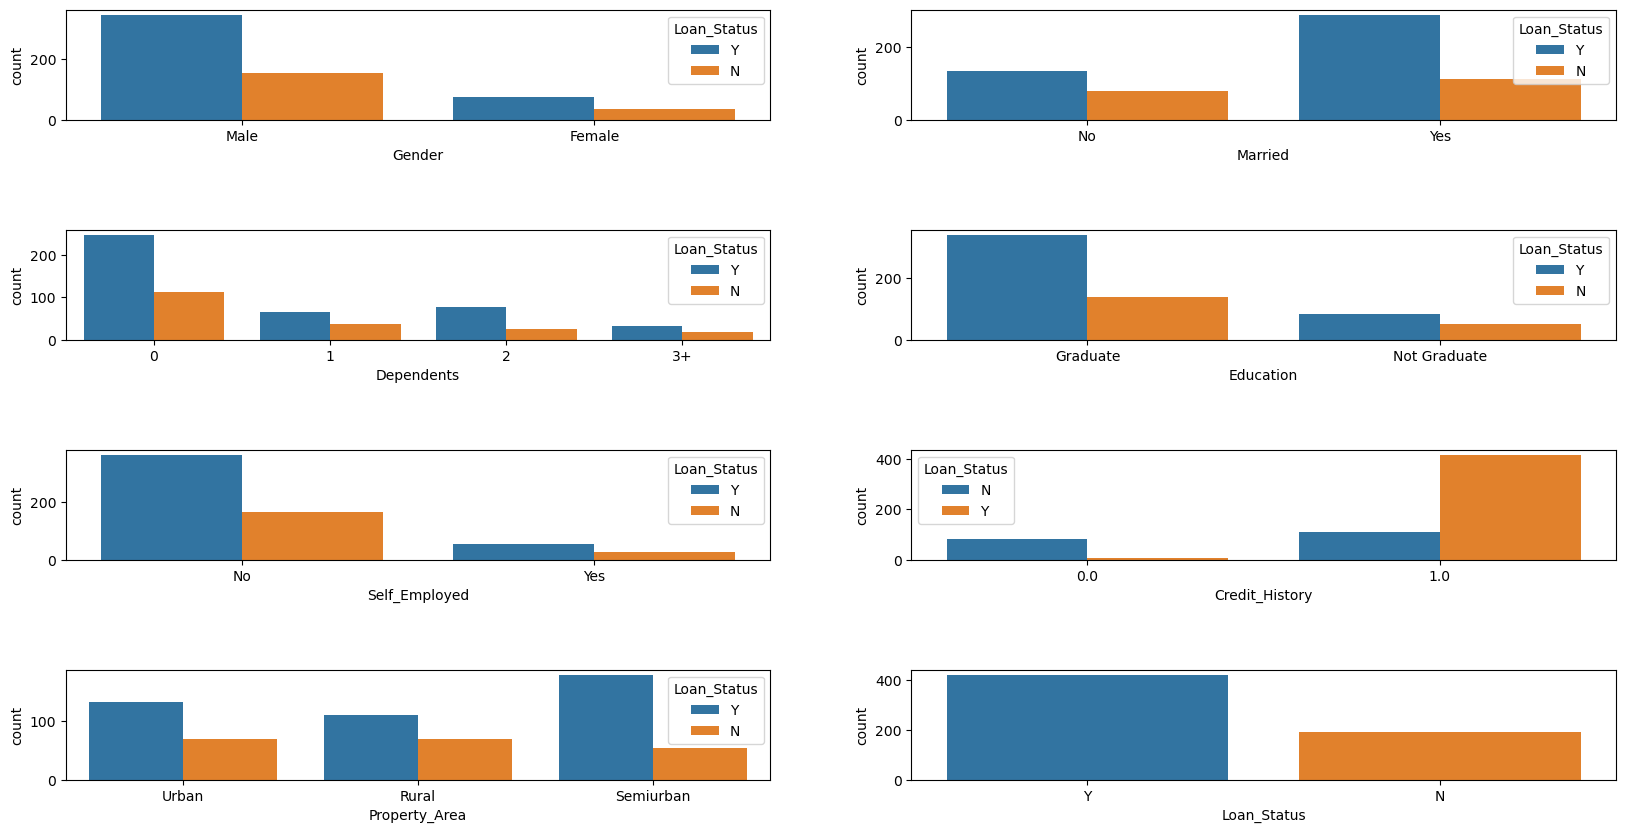

In [54]:
#Les variables catégoriques
fig,axes=plt.subplots(4,2,figsize=( 20,10))
for idx,cat_col in enumerate(var_cat):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)


<Axes: >

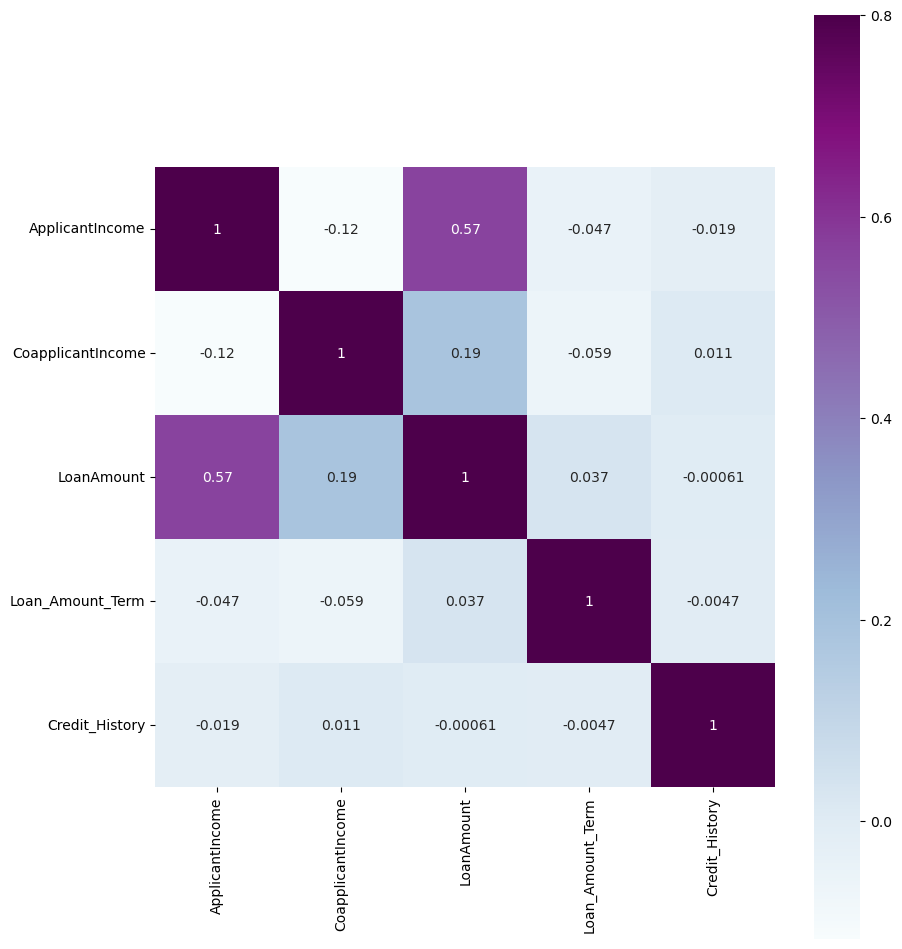

In [62]:
#correlation entre les variables numeriques
numeric_df = df.select_dtypes(include=['float64', 'int64'])
matrix = numeric_df.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)